In [8]:
import pandas as pd
import requests #запросы
from datetime import datetime, timedelta


import matplotlib.pyplot as plt #библиотека для построения графиков
import csv

SOLUSDT
                   Date  Close Price
0  18.09.2024, 04:00:00       134.34
1  19.09.2024, 04:00:00       142.89
2  20.09.2024, 04:00:00       146.66
3  21.09.2024, 04:00:00       149.41
4  22.09.2024, 04:00:00       144.63
5  23.09.2024, 04:00:00       144.79
6  24.09.2024, 04:00:00       148.33
 



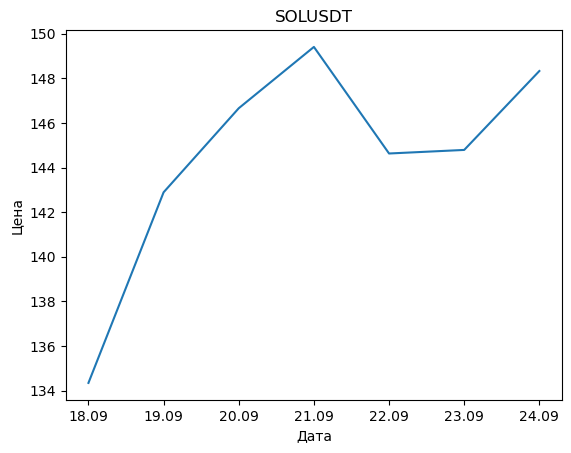

1INCHUSDT
                   Date  Close Price
0  18.09.2024, 04:00:00       0.2532
1  19.09.2024, 04:00:00       0.2698
2  20.09.2024, 04:00:00       0.2787
3  21.09.2024, 04:00:00       0.2896
4  22.09.2024, 04:00:00       0.2760
5  23.09.2024, 04:00:00       0.2831
6  24.09.2024, 04:00:00       0.2874
 



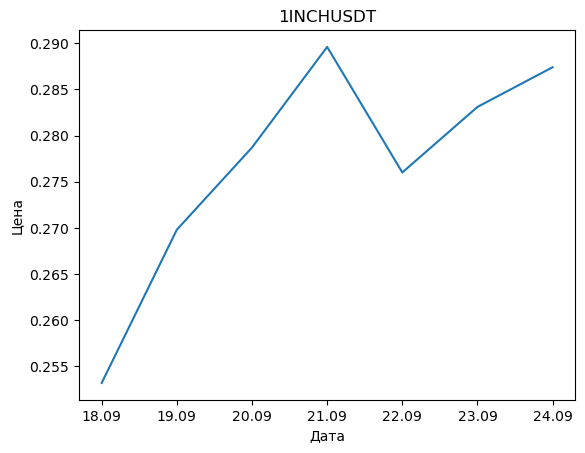

SUIUSDT
                   Date  Close Price
0  18.09.2024, 04:00:00       1.3141
1  19.09.2024, 04:00:00       1.3790
2  20.09.2024, 04:00:00       1.4698
3  21.09.2024, 04:00:00       1.4816
4  22.09.2024, 04:00:00       1.5848
5  23.09.2024, 04:00:00       1.5348
6  24.09.2024, 04:00:00       1.6740
 



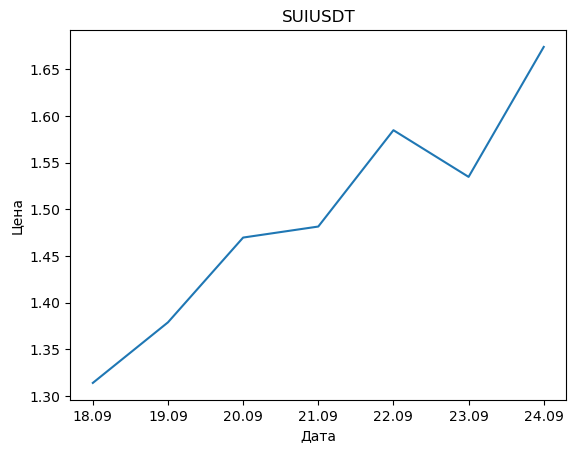

TONUSDT
                   Date  Close Price
0  18.09.2024, 04:00:00        5.641
1  19.09.2024, 04:00:00        5.683
2  20.09.2024, 04:00:00        5.585
3  21.09.2024, 04:00:00        5.673
4  22.09.2024, 04:00:00        5.620
5  23.09.2024, 04:00:00        5.640
6  24.09.2024, 04:00:00        5.619
 



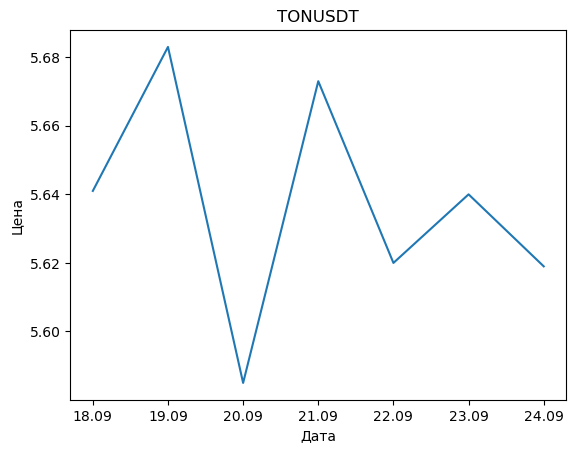

STRKUSDT
                   Date  Close Price
0  18.09.2024, 04:00:00       0.3900
1  19.09.2024, 04:00:00       0.3920
2  20.09.2024, 04:00:00       0.4010
3  21.09.2024, 04:00:00       0.4110
4  22.09.2024, 04:00:00       0.3890
5  23.09.2024, 04:00:00       0.4040
6  24.09.2024, 04:00:00       0.4082
 



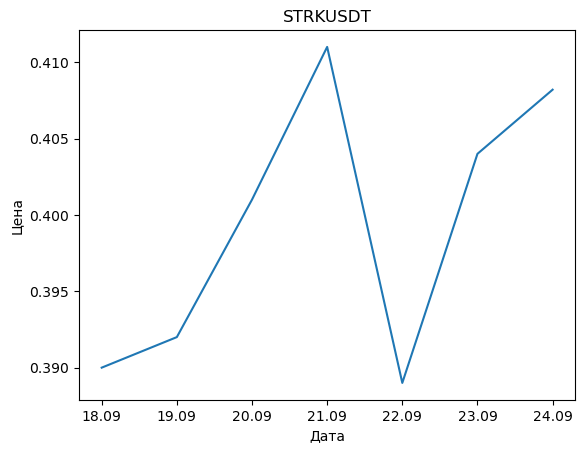

In [33]:

def find_token_price(name, days):
    
    
    end = int(datetime.now().timestamp() * 1000)
    start = int((datetime.now() - timedelta(days=days)).timestamp() * 1000) 


    url = f'https://api.binance.com/api/v3/klines'
    
    
    params = {
        'symbol': name,
        'interval': '1d',
        'startTime': start,
        'endTime': end,
        'limit': 7
        }

    response = requests.get(url, params=params)
    data = response.json()
    
    if response.status_code == 200:
        data = response.json()
#         print(data)
        poke = []
    
        for i in data:
            close_time = datetime.fromtimestamp(i[0] / 1000).strftime("%d.%m.%Y, %H:%M:%S")
            close_price = float(i[4])
            poke.append((close_time, close_price))
        
        df = pd.DataFrame(poke, columns = ['Date', 'Close Price'])

        df.to_csv(f'{name}.csv', index = False, header = False)
        return df

    else:
        print(f"Ошибка: {response.status_code}")
        return None


    
# symbol = "SOLUSDT" 
days = 7
symb = ['SOLUSDT', '1INCHUSDT', 'SUIUSDT', 'TONUSDT', 'STRKUSDT']

# , '1INCHUSDT', 'SUIUSDT', 'TONUSDT', 'STRKUSDT'

# for name in symb:
#     find_token_price(name, days)
# #     print(name)

for name in symb:
    print(name)
    result = find_token_price(name, days)
    if result is not None:
        print(result)
        print( ' \n')
        
        #Строим график
        
        x = []
        y = []

        with open(f'{name}.csv', 'r') as datafile:
            plotting = csv.reader(datafile, delimiter = ',')
    
    
            for rows in plotting:
                x.append(rows[0][:5])
                y.append(float(rows[1]))

        plt.plot(x,y)
        plt.title(f'{name}')
        plt.xlabel('Дата')
        plt.ylabel('Цена')
        plt.show()








# Вторая таска 